In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap

In [2]:
# prompt: mount

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
parent_dir = '/content/drive/MyDrive'

In [5]:
OSS_metadata_file_path = f'{parent_dir}/Phase 2_Research projects.xlsx - Data.csv'
github_activity_file_path = f'{parent_dir}/combined_file.csv'
first_last_access_date_path = f'{parent_dir}/first_last_access_date.csv'

In [6]:
OSS_metadata_df = pd.read_csv(OSS_metadata_file_path)
OSS_metadata_df[['ProjectName', 'GithubLink']] = OSS_metadata_df[['ProjectName', 'GithubLink']].astype(str)
OSS_metadata_df = OSS_metadata_df[~OSS_metadata_df['ProjectName'].str.contains('Example')]

In [7]:
github_activity_df = pd.read_csv(github_activity_file_path)

<ipython-input-7-33432e9a0ec9>:1: DtypeWarning: Columns (55,56,57,58,59,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  github_activity_df = pd.read_csv(github_activity_file_path)


In [8]:
first_last_access_date_df = pd.read_csv(first_last_access_date_path)
first_last_access_date_df[['Date first GitHub activity of the project:', 'Date last GitHub activity of the project:']] = first_last_access_date_df[['Date first GitHub activity of the project:', 'Date last GitHub activity of the project:']].astype(str)

In [9]:
OSS_metadata_df.head()

,ProjectName,GithubLink,WikipediaPageLink,ProjectType,Other_ProjectType,FundingModel,Other_FundingModel,GovernanceMode,Other_GovernanceMode,GovernanceToken_CoinmarketcapLink,Other_HasGovernanceToken,GovernanceTokens_Count,GovernanceTokens_Cap,AssociatedCommunities,FreeComments,% Tokens reserved for developers or team,DAO Name,Date of governance model change,Unnamed: 18,Unnamed: 19
2,Aldrin Exchange,https://github.com/aldrin-exchange,https://github.com/aldrin-exchange,Crypto exchange,NaN,Public token sale,NaN,Private company,NaN,https://coinmarketcap.com/currencies/aldrin/,NaN,0,0,No associated communities,No data available for Cap for Governance Tokens,NaN,NaN,NaN,NaN,NaN
3,AWARE Foundation,https://github.com/AwareFoundation,NaN,Token,NaN,Public token sale,NaN,Non-profit foundation,NaN,No governance token,NaN,NaN,NaN,No associated communities,NaN,NaN,NaN,NaN,NaN,NaN
4,Blockchain Game Alliance,https://github.com/blockchaingamealliance,NaN,Other,Blockchain Gaming,Product/service sales income,NaN,Consortium,NaN,https://coinmarketcap.com/currencies/blockchai...,NaN,0,0,No associated communities,NaN,NaN,NaN,NaN,NaN,NaN
5,Chainhub,https://github.com/chainhub,NaN,L1 protocol,NaN,Crowdfunding without token,NaN,Not centrally organized,NaN,No governance token,NaN,NaN,NaN,No associated communities,NaN,NaN,NaN,NaN,NaN,NaN
6,Anmol Network,https://github.com/anmolnetwork,NaN,L2 network,NaN,Crowdfunding without token,NaN,Private company,NaN,No governance token,NaN,NaN,NaN,No associated communities,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
github_activity_df.head()

,ID,GhRepo_2,GhRepo,date1,actor_id,actor_login,num_activities,num_dist_commits,num_dist_commitcomments,num_actors_pushevents,...,nna,Organization,ossname,projname,account,repo_name,sub_name,Actor ID,Unnamed: 32,Unnamed: 31
0,goldcoin,gldcoin,goldcoin/gldcoin,12/2/2013,NaN,akumaburn,2,2,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,goldcoin,gldcoin,goldcoin/gldcoin,12/2/2013,NaN,chrismetz,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,goldcoin,gldcoin,goldcoin/gldcoin,12/2/2013,NaN,tomxspeedy,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,goldcoin,gldcoin,goldcoin/gldcoin,12/8/2013,NaN,fajarferdian,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,goldcoin,paperwallet,goldcoin/paperwallet,12/12/2013,NaN,microguy,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
first_last_access_date_df.head()

,Timestamp,Title of the OSS project title you're submitting for,Date first GitHub activity of the project:,Date last GitHub activity of the project:
0,6/19/2024 19:26,aave,10/25/2019,5/27/2024
1,6/19/2024 20:50,arken-lab,2/1/2022,10/31/2023
2,6/20/2024 7:40,anmolnetwork,5/12/2021,1/20/2023
3,6/20/2024 9:21,AwareFoundation,12/8/2017,11/9/2018
4,6/20/2024 9:33,blockchaingamealliance,1/22/2022,11/23/2022


In [ ]:
first_last_access_date_df[first_last_access_date_df["Title of the OSS project title you're submitting for"]=='digipulseio']

,Timestamp,Title of the OSS project title you're submitting for,Date first GitHub activity of the project:,Date last GitHub activity of the project:


In [ ]:
PROJECT_TYPES = {'Wallet':'Wallet', 'Oracle':'Oracle', 'L1 protocol':'L1 Protocol', 'L2 network':'L2 Network', 'DApp':'DApp', 'Crypto exchange':'Crypto Exc', 'Token':'Token', 'Stablecoin':'Stablecoin', 'Memecoin':'Memecoin', 'Web 2.0 business':'Web 2.0 Biz', 'Other':'Other'}
FUNDING_MODELS = {'Public token sale':'Pub tkn sale', 'Crowdfunding without token': 'Crowdfunding w/o tkn', 'Product/service sales income':'Sales income', 'Donations':'Donations', 'Others':'Others'}
GOVERNANCE_MODES = {'Non-profit foundation':'Non-profit fndn', 'Private company':'Private comp', 'Consortium':'Consortium', 'Not centrally organized':"Not centrally org'd", 'Other (if DAO, specify name in DAO Name column)':'Other (e.g DAO)'}

In [ ]:
testDict = {'a':1, 'b': 2, 'c': 3}
print(testDict.keys())
print(testDict.values())

dict_keys(['a', 'b', 'c'])
dict_values([1, 2, 3])


In [ ]:
github_activity_df.columns

Index(['ID', 'GhRepo_2', 'GhRepo', 'date1', 'actor_id', 'actor_login',
       'num_activities', 'num_dist_commits', 'num_dist_commitcomments',
       'num_actors_pushevents', 'num_actors_pusheventscomment',
       'num_dist_pullreqopened', 'num_dist_pullreqclosed',
       'num_dist_pullreqAll', 'num_dist_pullreqcomments', 'num_actors_pullreq',
       'num_actors_pullreqcomment', 'num_actors_pullreq_opened',
       'num_actors_pullreq_closed', 'num_dist_issuesopened',
       'num_dist_issuesclosed', 'num_dist_issuesAll', 'num_dist_issuecomments',
       'num_actors_issues', 'num_actors_issuescomment', 'num_actors_allevents',
       'num_actors_issues_opened', 'num_actors_issues_closed',
       'num_forks_event', 'num_actors_forks', 'num_watch_event',
       'num_actors_watch', 'num_releases', 'Year', 'is_user_bot',
       'num_activities_bot', 'num_activities_not_bot', 'num_actors_not_bot',
       'num_commits_bot', 'num_commits_not_bot', 'num_actors_commits_not_bot',
       'num_pullre

In [ ]:
HEADERS = [header for header in github_activity_df.columns if "not_bot" in header]

In [ ]:
HEADERS

['num_activities_not_bot',
 'num_actors_not_bot',
 'num_commits_not_bot',
 'num_actors_commits_not_bot',
 'num_pullreq_not_bot',
 'num_actors_pullreq_not_bot',
 'num_issues_not_bot',
 'num_actors_issues_not_bot',
 'num_forks_not_bot',
 'num_actors_forks_not_bot',
 'num_watch_not_bot',
 'num_actors_watch_not_bot']

In [12]:
def quantitative_data(attribute):
  match attribute:
    case 'ProjectType':
      specifiers = PROJECT_TYPES
    case 'FundingModel':
      specifiers = FUNDING_MODELS
    case 'GovernanceMode':
      specifiers = GOVERNANCE_MODES
    case _:
      specifiers = []
  attribute_means = {}
  attribute_OSSList = {}
  for specifier in specifiers.keys():
    specifier_df = OSS_metadata_df[OSS_metadata_df[attribute] == specifier]
    OSSList = [link[link.rfind('/')+1:] for link in specifier_df["GithubLink"]]
    # attribute_osss[specifier] = OSSsList
    running_sum = 0
    num_oss = 0
    print(f"{attribute}/{specifier}", end=" ")
    for oss_idx, oss in enumerate(OSSList):
      print(f"{oss}", end=" ")
      try:
        oss_total = github_activity_df[github_activity_df["ID"]==oss][HEADERS].sum().sum()
        if oss_total == 0: continue

        first_date_series = first_last_access_date_df[first_last_access_date_df["Title of the OSS project title you're submitting for"]==oss]["Date first GitHub activity of the project:"]
        last_date_series = first_last_access_date_df[first_last_access_date_df["Title of the OSS project title you're submitting for"]==oss]["Date last GitHub activity of the project:"]

        if first_date_series.empty or last_date_series.empty:
          continue

        first_date = pd.to_datetime(first_date_series.iloc[0])
        last_date = pd.to_datetime(last_date_series.iloc[0])
        range = (last_date-first_date).total_seconds()/(60*60*24*365.25)

        if range <= 0: continue

        oss_avg = oss_total/range
        running_sum += oss_avg

        num_oss += 1

      except:
        pass
    print()
    print(f"Specifier: {specifier} | Calculated {num_oss}/{len(OSSList)} | Total Sum: {running_sum}", end="\n\n")
    attribute_means[specifiers[specifier]] = running_sum/num_oss
    attribute_OSSList[specifiers[specifier]] = OSSList

  return attribute_means

In [ ]:
project_type_activity_metrics = quantitative_data('ProjectType')

ProjectType/Wallet digipulseio futuro-coin JouleTeam Lonero-Team SovranoCoin naboxwallet rainbow-me Wallet3 0xcregis earthwallet FiiiLab SolbitManager blitslabs TENTOfficial brave AlphaWallet Squads-Protocol glow-xyz cake-tech decenomy trezor martexcoin OneKeyHQ mdukey itering 
Specifier: Wallet | Calculated 14/25 | Total Sum: 458820.66829899466

ProjectType/Oracle razor-network antlia-io amiromayer umbrella-network konomi-network 
Specifier: Oracle | Calculated 3/5 | Total Sum: 1192.691964205474

ProjectType/L1 protocol chainhub EOSLaoMao dfinity-lab litecoin-foundation abjcoinblockchain Coreum flowchain InsurChain bitshares-cnvote RiseVision Agusx1211 PolymeshAssociation Andoromeda-Foundation fetchai KuChainNetwork  bnb-chain playgame-global freeverseio okp4 pchain-org yottachain mgpai22 iron-fish ErgoGravity ProjectLarix Stride-Labs 01node meTokens p2p-org SuperLauncher Lunes-platform wise-team gnolang capsule-corp-ternoa OmniLayer hyperledger SAFE-anwang EcoDollar adamantfinance aa

In [ ]:
funding_model_activity_metrics = quantitative_data('FundingModel')

FundingModel/Public token sale aldrin-exchange AwareFoundation AmaraFinance airbloc BankToTheFuture cykura Circelpod Lonero-Team ChangeNow-io SovranoCoin aave DeFinerOrg JackalLabs abjcoinblockchain arqma Bitcoin-PRO cannationproject Coreum Crypto-Currency flowchain hai-on-op InsurChain Metalde bitshares-cnvote RiseVision vivocoin InoCoin METADIUM PolymeshAssociation rigelprotocol Smartlinkhub ToucanProtocol BoringDAO DAPScoin Andoromeda-Foundation apollodao CoinPokerOfficial dystopia-exchange fetchai  naboxwallet bnb-chain 10k-swap asuracoin Derace eosdac MilkShake-Swap dethertech fr8network impactMarket quark-project MindCoinTeam bibox365 NAOS-Finance antlia-io ApeX-Protocol atonomi copicogithub1 iron-fish Wasmswap DeepCloud-AI gravis-finance indahash ProjectLarix OracolXor Polkalokr RequestNetwork sirin-labs Tokpie vetherasset ajuna-network HunnyFinance magnetwork compound-finance GrandcoinGDC melonproject osa-decentralized Polkadot-Heroes renproject straks acoin-project bitfinity-n

In [ ]:
governance_mode_activity_metrics = quantitative_data('GovernanceMode')

GovernanceMode/Non-profit foundation AwareFoundation Centric-Org dfinity-lab litecoin-foundation DAPScoin ErgoGravity firoorg renproject consensus-shipyard BerkeleyBlockchain EverGreenCoinDev mapprotocol OmniLayer hyperledger SAFE-anwang reddcoin-project 
Specifier: Non-profit foundation | Calculated 9/16 | Total Sum: 7258181034.795803

GovernanceMode/Private company asuracoin cartridge-gg creator-rs Derace LiliumErgo Nibble-Network Pancakelock powerpool-finance triipme Wallet3 
Specifier: Private company | Calculated 6/10 | Total Sum: 10135.66987800659

GovernanceMode/Consortium blockchaingamealliance EOSLaoMao BoringDAO bnb-chain Mushroom-Protocol aptid equilibria-xyz fedimint rate-engineering daostack HyperJump-DeFi The-Cypherfunks 
Specifier: Consortium | Calculated 9/12 | Total Sum: 114017.36393250854

GovernanceMode/Not centrally organized chainhub AmaraFinance BankToTheFuture cykura Circelpod VaultsProtocol holgern Lonero-Team sarcophagus-org TaggrNetwork WePiggy arken-lab campu

In [ ]:
NOTE = "*The activity valuation was calculated by taking the average of the ratios of the sums of all 'non-bot' data for an OSS and the number of years that OSS had been in operation."

In [ ]:
def create_log_scale_bar_graph(data, title, xlabel, note=NOTE, wrap_width=80):
    # Create a bar graph
    fig, ax = plt.subplots()
    ax.bar(data.keys(), data.values())

    # Set the y-axis to a log scale
    ax.set_yscale('log')

    # Title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Activity Valuation (log scale)')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    wrapped_note = "\n".join(textwrap.wrap(note, wrap_width))

    # Add a note
    # plt.figtext(0.5, -0.05, wrapped_note, ha='left', fontsize=10)
    plt.figtext(0.1, -0.07, wrapped_note, ha='left', fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()

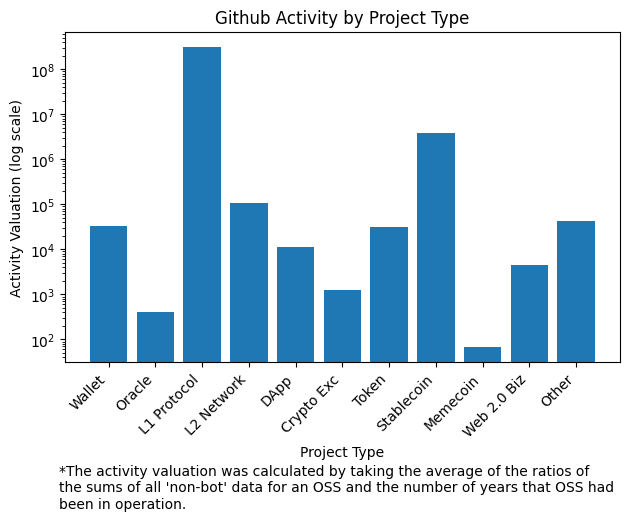

In [ ]:
create_log_scale_bar_graph(project_type_activity_metrics, "Github Activity by Project Type", "Project Type")

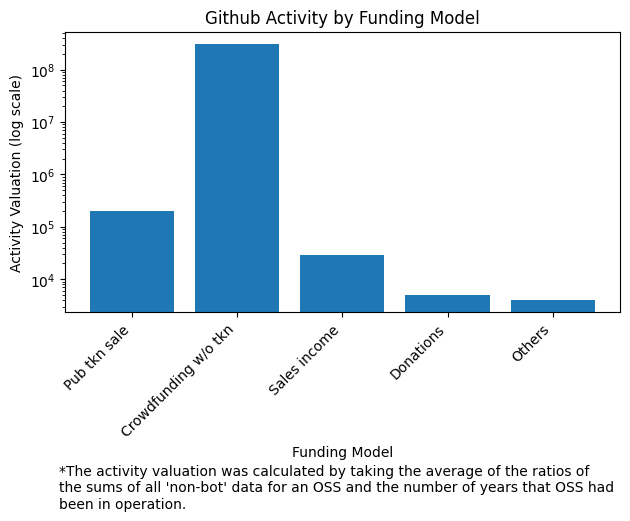

In [ ]:
create_log_scale_bar_graph(funding_model_activity_metrics, "Github Activity by Funding Model", "Funding Model")

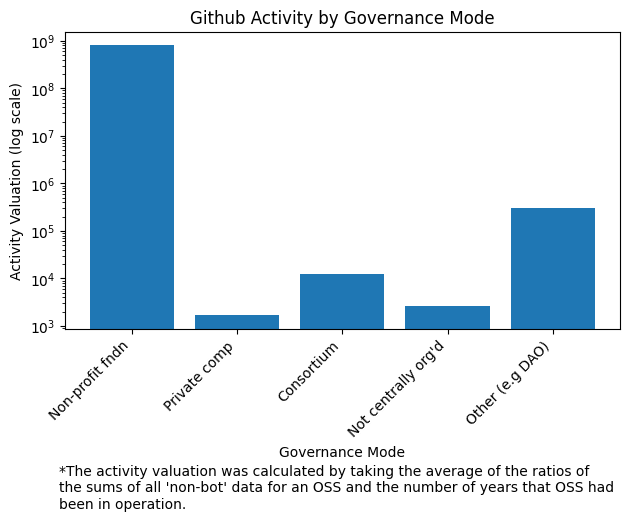

In [ ]:
create_log_scale_bar_graph(governance_mode_activity_metrics, "Github Activity by Governance Mode", "Governance Mode")